In [2]:
# 대기 오염 데이터에 머신러닝 기반의 회귀 분석을 수행하여 미세먼지와의 연관성을 분석한다.

In [3]:
import urllib.request
import datetime
import json
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [ ]:
ServiceKey = 'a8397ec56107bfaa5703edc7d1255a3146df523a8847655259f1bf75edf96fb3'

In [ ]:
def getRequestUrl(url):
    req = urllib.request.Request(url)
    try:
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print("[%s] Url Request Success" %datetime.datetime.now())
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("[%s] Error for URL: %s"%(datetime.datetime.now(), url))
        return None


In [ ]:
def reqAirInfo(where, beginDay, endDay, numOfRows):
    service_url = 'http://apis.data.go.kr/B552584/ArpltnStatsSvc/getMsrstnAcctoRDyrg'
    parameters = "?returnType=json&serviceKey="+ ServiceKey
    parameters += "&msrstnName=" + (urllib.parse.quote(where))
    parameters += "&inqBginDt=" + beginDay
    parameters += "&inqEndDt=" + endDay
    parameters += "&numOfRows=" + numOfRows
    url = service_url + parameters
    print(url)
    
    responseDecode = getRequestUrl(url)
    
    if(responseDecode == None):
        return None
    else:
        return json.loads(responseDecode)

In [ ]:
def getAirInfoItem(item, result):
    msrstnName = item['msrstnName']
    msurDt = item['msurDt']
    so2Value = item['so2Value']
    coValue = item['coValue']
    o3Value = item['o3Value']
    no2Value = item['no2Value']
    pm10Value = item['pm10Value']
    pm25Value = item['pm25Value']
    
    result.apppend([msrstnName, msurDt, so2Value, coValue, o3Value, no2Value, pm10Value, pm25Value])

In [1]:
where = input('대기오염 데이터 수집 측정소 입력: ')
beginDay = input('대기오염 데이터 수집 시작 일자: ')
endDay = input('대기오염 데이터 수집 종료 일자: ')


In [ ]:
b_date = datetime.datetime.strptime(beginDay, '%Y%m%d')
e_date = datetime.datetime.strptime(endDay, '%Y%m%d')
days = e_date - b_date
numOfRows = str(days.days)

jsonResponse = []
result = []

In [37]:
jsonResponse = reqAirInfo(where, beginDay, endDay, numOfRows)

http://apis.data.go.kr/B552584/ArpltnStatsSvc/getMsrstnAcctoRDyrg?returnType=json&serviceKey=a8397ec56107bfaa5703edc7d1255a3146df523a8847655259f1bf75edf96fb3&msrstnName=%EC%A2%85%EB%A1%9C%EA%B5%AC&inqBginDt=20220401&inqEndDt=20240215&numOfRows=685
HTTP Error 403: Forbidden
[2025-11-08 17:42:48.598808] Error for URL: http://apis.data.go.kr/B552584/ArpltnStatsSvc/getMsrstnAcctoRDyrg?returnType=json&serviceKey=a8397ec56107bfaa5703edc7d1255a3146df523a8847655259f1bf75edf96fb3&msrstnName=%EC%A2%85%EB%A1%9C%EA%B5%AC&inqBginDt=20220401&inqEndDt=20240215&numOfRows=685


## 파일로 사용 방법

In [22]:
import numpy as np
import pandas as pd

In [23]:
data_df = pd.read_csv('대기오염데이터_종로구_20220401_20240215.csv', header=0, encoding='utf-8', engine = 'python')


In [24]:
print(data_df.shape)

(673, 8)


In [25]:
# isna() -> 결측치 즉 비어있는 값 null 찾기
data_df.isna().sum()

location    0
day         0
so2         7
co          0
o3          0
no2         0
pm10        0
pm25        0
dtype: int64

In [26]:
data_df = data_df.fillna(data_df['so2'].median()) # 결측치 평균값으로 채우기
data_df.isna().sum()

location    0
day         0
so2         0
co          0
o3          0
no2         0
pm10        0
pm25        0
dtype: int64

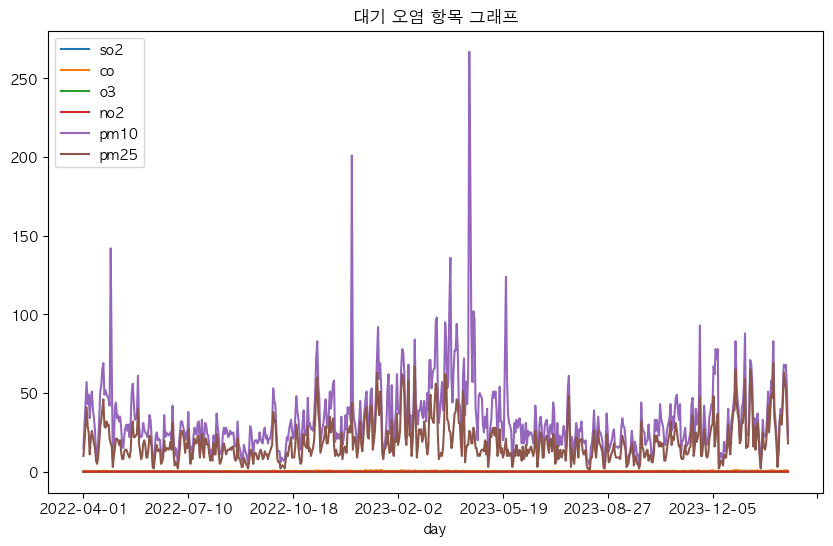

In [27]:
import matplotlib
import matplotlib.pyplot as plt

plt.rc('font', family = 'AppleGothic')

graph_df = data_df.drop(['location'], axis = 1, inplace = False)
graph_df.set_index('day', inplace=True)
graph_df.plot(kind = 'line', figsize=(10,6))

plt.title('대기 오염 항목 그래프')
plt.xlabel('day')
plt.legend(loc = 'upper left') # 범례 위치
plt.show()

In [28]:
data_df2

,so2,co,o3,no2,pm10,pm25
0,0.003,0.4,0.034,0.017,15,10
1,0.004,0.4,0.036,0.022,30,19
2,0.004,0.5,0.041,0.024,43,30
3,0.004,0.6,0.040,0.029,57,41
4,0.004,0.5,0.044,0.032,43,29
...,...,...,...,...,...,...
668,0.003,0.7,0.037,0.026,68,63
669,0.003,0.8,0.024,0.046,67,59
670,0.003,1.0,0.017,0.069,68,52
671,0.004,0.8,0.020,0.058,52,35


In [29]:
import types

for col in data_df.columns:
    has_method = data_df[col].apply(lambda v: isinstance(v, (types.MethodType, types.BuiltinMethodType) ))
    if has_method.any():
        print("METHOD FOUND in:", col)
        print(data_df.loc[has_method, col].head())

In [30]:
from sklearn.preprocessing import StandardScaler

data_df2 = data_df.drop(['location', 'day'], axis = 1, inplace = False)
data_df2_scaled = StandardScaler().fit_transform(data_df2.values)
data_df2 = pd.DataFrame(data_df2_scaled)
data_df2.columns = ['so2', 'co', 'o3', 'no2', 'pm10', 'pm25']

In [34]:
day_df = data_df[['day']].copy()
graph_df2 = pd.concat([day_df, data_df2], axis=1) # 합치기

graph_df2

,day,so2,co,o3,no2,pm10,pm25
0,2022-04-01,-0.230394,-0.533379,0.141672,-0.346313,-0.788390,-0.733263
1,2022-04-02,1.615500,-0.533379,0.281990,0.104497,-0.134958,0.000121
2,2022-04-03,1.615500,0.124064,0.632782,0.284821,0.431349,0.896480
3,2022-04-04,1.615500,0.781508,0.562624,0.735631,1.041219,1.792839
4,2022-04-05,1.615500,0.124064,0.843258,1.006118,0.431349,0.814993
...,...,...,...,...,...,...,...
668,2024-02-11,-0.230394,1.438951,0.352148,0.465145,1.520402,3.585557
669,2024-02-12,-0.230394,2.096395,-0.559913,2.268387,1.476840,3.259608
670,2024-02-13,-0.230394,3.411282,-1.051023,4.342114,1.520402,2.689198
671,2024-02-14,1.615500,2.096395,-0.840548,3.350331,0.823408,1.303916


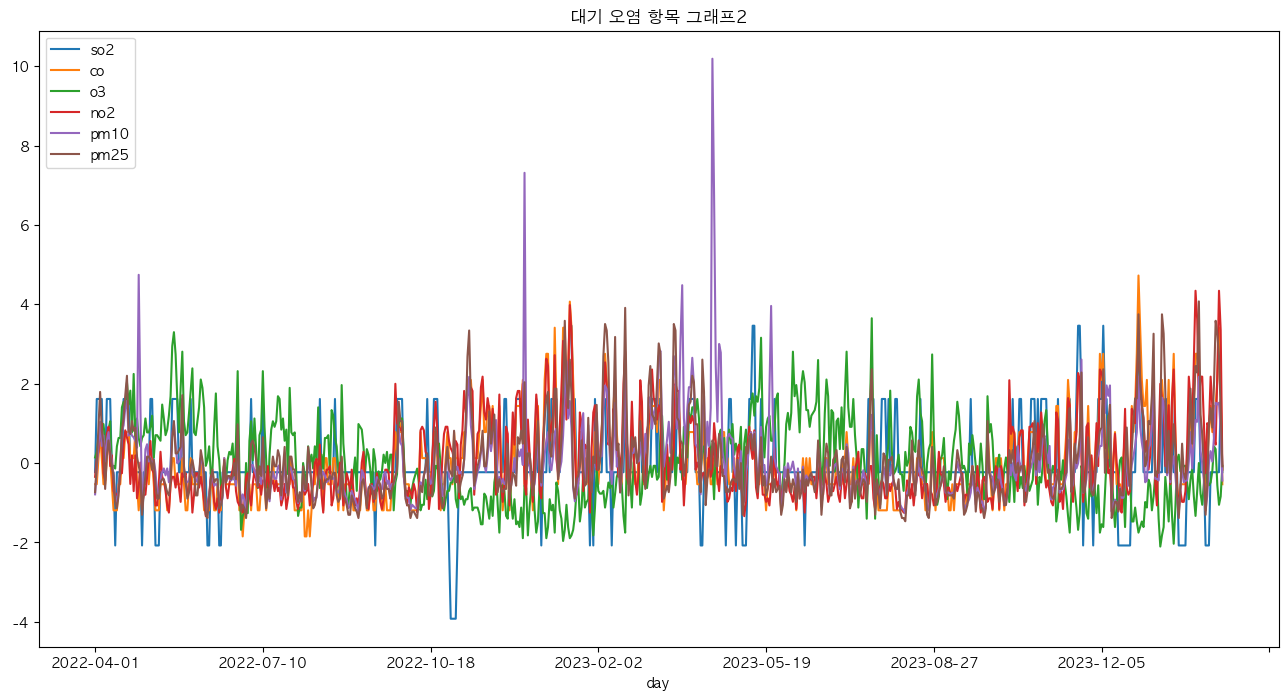

In [35]:
graph_df2.set_index('day', inplace = True)
graph_df2.plot(kind = 'line', figsize = (16, 8))
plt.title ('대기 오염 항목 그래프2')
plt.xlabel('day')
plt.legend(loc = 'upper left')
plt.rcParams['axes.unicode_minus'] = False
plt.show()

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
Y_pm10 = data_df['pm10']
Y_pm25 = data_df['pm25']
X = data_df.drop(['location', 'day', 'pm10', 'pm25'], axis = 1, inplace = False)


In [38]:
X_train, X_test, Y_pm10_train, Y_pm10_test = train_test_split(X, Y_pm10, test_size = 0.3, random_state=156)


In [39]:
lr_pm10 = LinearRegression()

In [40]:
lr_pm10.fit(X_train, Y_pm10_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
Y_pm10_predict = lr_pm10.predict

In [43]:
# 평가하기
mse = mean_squared_error(Y_pm10_test, Y_pm10_predict)
rmse = np.sqrt(mse)

# 0번째인수 소수 3번째, 1번째 인수 소수 3번쨰
print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse, rmse))

print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_pm10_test, Y_pm10_predict)))

MSE: 293.367, RMSE: 17.128
R^2(Variance score) : 0.344


In [44]:
print('Y_pm10 절편 값: ', lr_pm10.intercept_)
print('회귀 계수 값: ', np.round(lr_pm10.coef_, 1))

Y_pm10 절편 값:  -24.637204220135338
회귀 계수 값:  [2512.8   55.2  444.8  447.3]


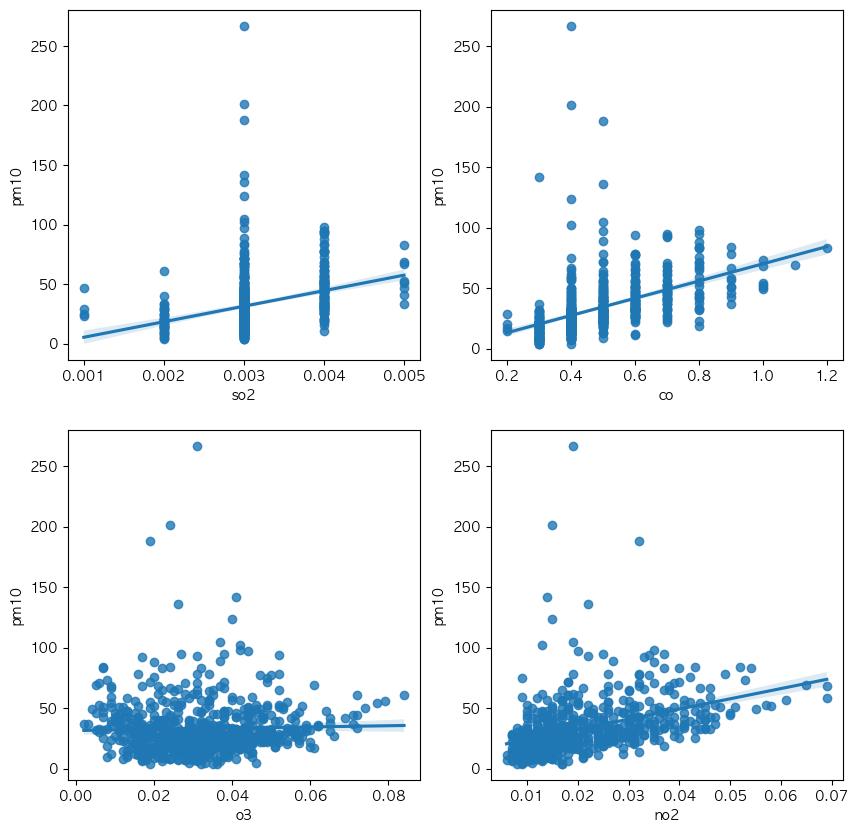

In [ ]:
fig, axs = plt.subplots(figsize=(10, 10), ncols = 2, nrows = 2)
x_features = ['so2', 'co', 'o3', 'no2']

# pm10과 4개의 피처와의 관계를 보여주는 4개 그래프 시각화
for i, feature in enumerate(x_features):
    row = int(i/2)
    col = i%2
    sns.regplot(x = feature, y = 'pm10', data=data_df, ax=axs[row][col])

In [47]:
# 초미세먽 

X_train, X_test, Y_pm25_train, Y_pm25_test = train_test_split(X, Y_pm25, test_size = 0.3, random_state=156)

In [48]:
lr_pm25 = LinearRegression()

In [49]:
lr_pm25.fit(X_train, Y_pm25_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
Y_pm25_predict = lr_pm25.predict(X_test)

In [51]:
# 평가하기
mse = mean_squared_error(Y_pm25_test, Y_pm25_predict)
rmse = np.sqrt(mse)

# 0번째인수 소수 3번째, 1번째 인수 소수 3번쨰
print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse, rmse))

print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_pm25_test, Y_pm25_predict)))

MSE: 51.813, RMSE: 7.198
R^2(Variance score) : 0.661


In [52]:
print('Y_pm10 절편 값: ', lr_pm25.intercept_)
print('회귀 계수 값: ', np.round(lr_pm25.coef_, 1))

Y_pm10 절편 값:  -22.952459871175382
회귀 계수 값:  [776.   61.5 218.2 136.8]


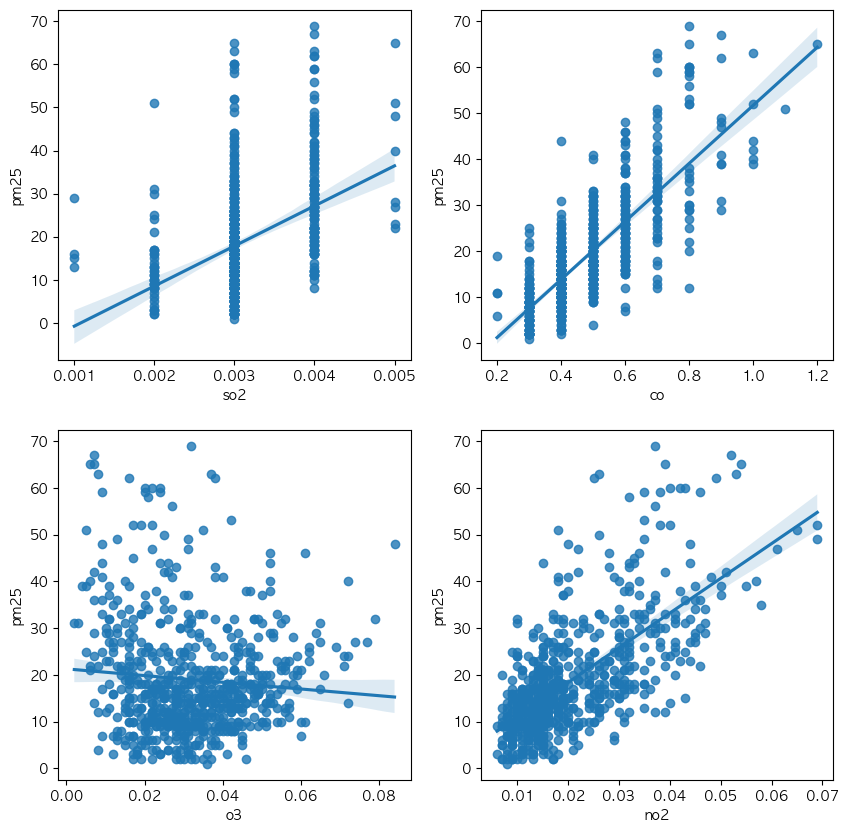

In [53]:
fig, axs = plt.subplots(figsize=(10, 10), ncols = 2, nrows = 2)
x_features = ['so2', 'co', 'o3', 'no2']

# pm10과 4개의 피처와의 관계를 보여주는 4개 그래프 시각화
for i, feature in enumerate(x_features):
    row = int(i/2)
    col = i%2
    sns.regplot(x = feature, y = 'pm25', data=data_df, ax=axs[row][col])